## Tarea

**1** Para el problema de la clase pasada encuentre la primera y segunda derivada de forma analítica con sympy y grafique usando lambdify

**2** Obtenga para la misma función la primera y segunda derivada de forma numérica con SciPy y grafique ambas.

**3** Para el conjunto de datos $(x,y)$ obtenga la primera y segunda derivada de forma discreta, recuerde que la derivada de la primera derivada es la segunda derivada.

$$f(x) =e^{\sin(x)}$$

$$\frac{d}{dx} e^{\sin(x)} = cos(x)e^{sin(x)} $$

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from warnings import filterwarnings
filterwarnings("ignore")

**1** Para el problema de la clase pasada encuentre la primera y segunda derivada de forma analítica con sympy y grafique usando lambdify


In [69]:
# Primera derivada
x = Symbol('x')
funcion = exp(sin(x))
derivada1 = funcion.diff(x)
derivada1

exp(sin(x))*cos(x)

In [70]:
# Segunda derivada
derivada2 = funcion.diff(x, 2)
derivada2

(-sin(x) + cos(x)**2)*exp(sin(x))

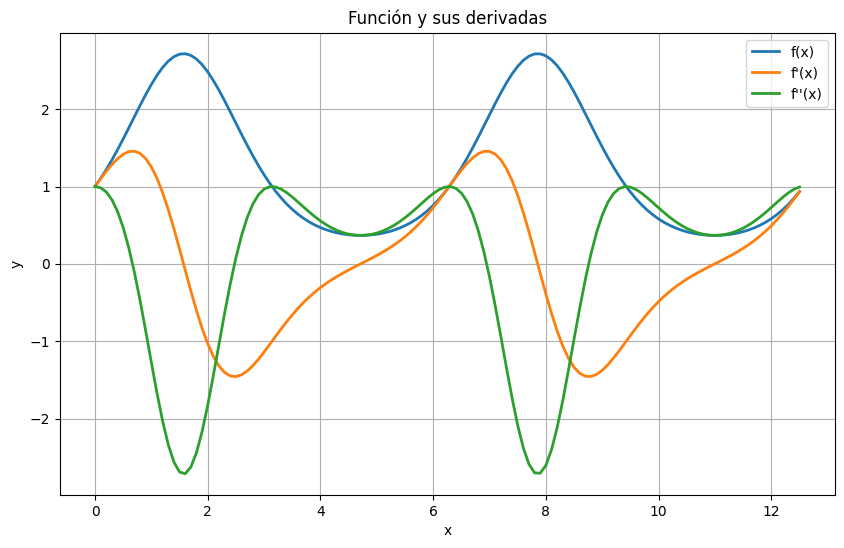

In [71]:
# Gráfica derivadas
x_datos = np.arange(0, 4*np.pi, 0.1)
funcion_grafica = lambdify(x, funcion, 'numpy')
derivada1_grafica = lambdify(x, derivada1, 'numpy')
derivada2_grafica = lambdify(x, derivada2, 'numpy')

plt.figure(figsize=(10, 6))
plt.plot(x_datos, funcion_grafica(x_datos), label='f(x)', linewidth=2)
plt.plot(x_datos, derivada1_grafica(x_datos), label="f'(x)", linewidth=2)
plt.plot(x_datos, derivada2_grafica(x_datos), label="f''(x)", linewidth=2)

plt.title('Función y sus derivadas')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True) 
plt.legend()
plt.show()

**2** Obtenga para la misma función la primera y segunda derivada de forma numérica con SciPy y grafique ambas.

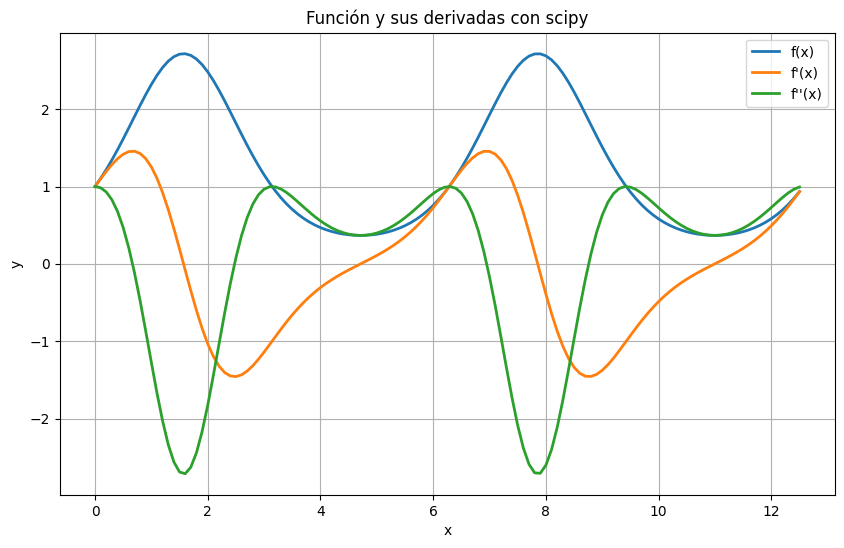

In [72]:
# Cálculo de la derivada con scipy
from scipy.misc import derivative

# Definición de la función con Python
def funcion_py(t):
    return np.exp(np.sin(t))

# Derivadas numéricas con scipy
derivada1_sc = derivative(funcion_py, x_datos, dx=1e-6, n=1)
derivada2_sc = derivative(funcion_py, x_datos, dx=1e-6, n=2)

plt.figure(figsize=(10, 6))
plt.plot(x_datos, funcion_py(x_datos), label='f(x)', linewidth=2)
plt.plot(x_datos, derivada1_sc, label="f'(x)", linewidth=2)
plt.plot(x_datos, derivada2_sc, label="f''(x)", linewidth=2)

plt.title('Función y sus derivadas con scipy')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
plt.legend()
plt.show()

**3** Para el conjunto de datos $(x,y)$ obtenga la primera y segunda derivada de forma discreta, recuerde que la derivada de la primera derivada es la segunda derivada.

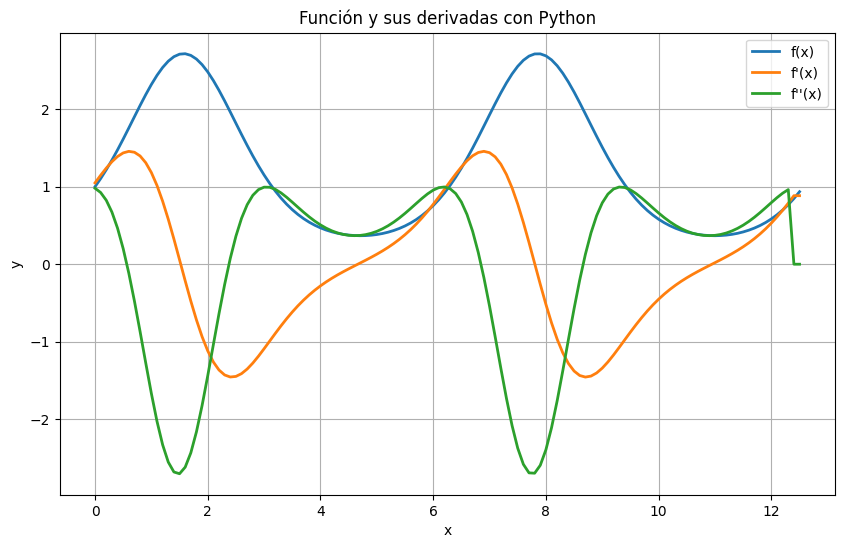

In [73]:
# Definición derivada discreta con Python
def derivada(x, y):
  dy=[]
  for i in range(1, len(x)):
    d = (y[i] - y[i-1]) / (x[i] - x[i-1])
    dy.append(d)
  return dy

x_datos = np.arange(0, 4*np.pi, 0.1)
y_datos = np.exp(np.sin(x_datos))

dy = derivada(x_datos, y_datos)
dy.append(dy[-1])

dy2 = derivada(x_datos, dy)
# También se agrega el último valor para mantener la misma longitud
# Aún así, en la gráfica habrá un punto menos de precisión
dy2.append(dy2[-1])

plt.figure(figsize=(10, 6))
plt.plot(x_datos, y_datos, label='f(x)', linewidth=2)
plt.plot(x_datos, dy, label="f'(x)", linewidth=2)
plt.plot(x_datos, dy2, label="f''(x)", linewidth=2)

plt.title('Función y sus derivadas con Python')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
plt.legend()
plt.show()